In [0]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score,precision_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt


In [0]:
Data,Target=load_digits(n_class=10, return_X_y=True)
print(Data.shape,Target.shape)

(1797, 64) (1797,)


In [0]:
# 5'ten buyuk sayilari 1 e, kucukleri 0 a ata 
Target=np.uint8(Target>5)

In [0]:
# veri setini standardize edelim. Boylece veri sifir ortalama ve birim varyansa sahip olur.
Data = preprocessing.scale(Data)
# dataseti egitim ve test veri seti olarak ayir
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.2, random_state=42)
# modeli egitim seti ile egit
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predicted=clf.predict(X_test)

In [0]:
# accuracy, recall, precision metriklerini hesapla
acc=accuracy_score(y_test,y_predicted)
recall=recall_score(y_test,y_predicted)
precision=precision_score(y_test,y_predicted)
print('accuracy:',acc , 'recall:',recall, 'precision:', precision)

accuracy: 0.9111111111111111 recall: 0.9086021505376344 precision: 0.9184782608695652


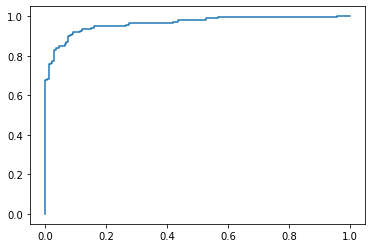

In [0]:
# auc yi hesapla,
y_predicted_prob=clf.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test,y_predicted_prob)
fpr, tpr, _=roc_curve(y_test,y_predicted_prob)
plt.plot(fpr,tpr)
plt.show()

In [0]:
def ReturnImageAndItsLabel(Data,model,width):
  NuOfImages=Data.shape[0]
  no=np.random.randint(NuOfImages)
  plt.imshow(Data[no,:].reshape(width,width),cmap='gray')
  plt.title('Prediction ='+str(model.predict(Data[no,None,:])[0]))
  plt.show()
  #print(Data[no,:].shape)
  #print(model.predict(Data[no,None,:]))
  


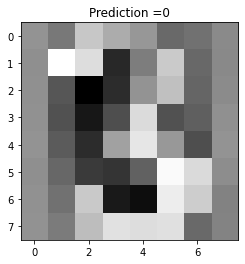

In [0]:
ReturnImageAndItsLabel(X_test,clf,8)